## **House Prices: EDA to ML (Beginner)**  

**This notebooks is adapted from these two Kaggle notebooks for House Prices competition: [Notebook 1](https://www.kaggle.com/code/dejavu23/house-prices-eda-to-ml-beginner/notebook) and [Notebook 2](https://www.kaggle.com/code/kushalagrawal11/eda-housing-price-dataset/notebook)**  (All credits to the authors, especially Kushall Agrawall who did the second notebook, to which this one is very similar!)
**It includes the following approaches and techniques:**

* Dataset exploration with Pandas
* Cleaning of data
* Summary statistics
* Univariate graphical EDA: boxplot, histogram 
* Cross-tabulation
* Multivariate graphical EDA: correlation matrix, pairplots.


![](https://www.reno.gov/Home/ShowImage?id=7739&t=635620964226970000)

**Data download:**
You can download the txt file here: [**download**](https://www.kaggle.com/code/kushalagrawal11/eda-housing-price-dataset/input?select=Housing.csv).
Please note that you will need to **create an account or sign in to Kaggle**.

**The notebook is organized as follows:**

* **[Part 1: Imports](#1-imports)**

* **[Part 2: Basic info and summary](#2-basic-info-and-summary)**

* **[Part 3: Numerical and Categorical Features](#3-numerical-and-categorical-features)**

* **[Part 4: Statistical Summary](#4-statistical-summary)**

* **[Part 5: Missing Values](#5-missing-values)**

* **[Part 6: Distributions](#6-distributions)**

* **[Part 7: Skewness and Kurtosis](#7-skewness-and-kurtosis)**

* **[Part 8: Bivariate Analysis](#8-bivariate-analysis)**
    8.1: Numerical vs Numerical
    8.2: Numerical vs Categorical
    8.3: Categorical vs Categorical

* **[Part 9: Multivariate Analysis](#9-plot-for-multivariate-relationships)**

* **[Part 10: Outlier Detection](#10-outlier-detection)**


**References**  

* **[Kaggle: Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)**
* **[Udemy: Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/)**
* **[Data School: Machine learning in Python with scikit-learn](https://www.youtube.com/playlist?list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A)**


To complete this notebook, you are required to have Python and Jupyter notebook installed on your laptop.
If you don't, please follow the instructions [here](https://docs.python.org/3/using/index.html) to download it.

## 1. Imports

In [241]:
# (Optional) Ignore warnings for cleaner outputs
import warnings
warnings.filterwarnings('ignore')

In [242]:
# Check that your Python version is up to date (3.12 or 3.13 will work for this class)
!python --version

Python 3.12.9


In [243]:
# Install kaggle and necessary data analysis libraries

!pip install kaggle
!pip install kagglehub
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

We will download the dataset from [Kaggle](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?resource=download). To do so, you first need to **create an account and/or sign in**.

In [4]:
# Open the dataset

import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")
#path = kagglehub.dataset_download("ignacioazua/world-gdp-population-and-co2-emissions-dataset")

print("Path to dataset files:", path)

print("Path to dataset files:", path) # Path to the downloaded folder 
filename = os.listdir(path)
print(filename) # Shows content of the folder
#filepath=os.path.join(path, "World_GDP_Population_CO2_Emissions_Dataset.csv")
filepath=os.path.join(path, "Housing.csv")
print(filepath)

Path to dataset files: /home/cgraiff/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1
Path to dataset files: /home/cgraiff/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1
['Housing.csv']
/home/cgraiff/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1/Housing.csv


In [2]:
# Importing necessary libraries for the analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#df = pd.read_csv(filepath) 
#df=pd.read_csv("/home/cgraiff/Téléchargements/1918-2019election_results.csv", encoding="latin")


## 2. Basic info and summary

In [5]:
# Read dataset into a pandas dataframe
df = pd.read_csv(filepath) 

# Visualize the first 5 rows
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [200]:
# Visualize the last 5 rows

df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [201]:
""" 
Visualize a summary of the dataframe:

1. Class & index info

    The type of object (<class 'pandas.core.frame.DataFrame'>).

    The index range (e.g., RangeIndex: 100 entries, 0 to 99).

2. Column info

    Each column's name.

    The number of non-null values (helpful for spotting missing data).

    The data type (int64, float64, object, datetime64[ns], category, etc.).

3. Type info

    All the dtypes present in the dataset and their count. 

4. Memory usage

    Shows how much memory the DataFrame consumes.

"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## 3. Numerical and Categorical Features

Let's explore the features described in our dataset, to distinguish between **numerical** and **categorical** ones. Please try to recall the content of the lesson!

In [202]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  6
Number of Categorical features:  7


As you can see, you already had this info: check the output of df.info()! You can see that 6 of the variables are **integers**, and 7 are **objects** (strings). 
Let's check which columns contain numerical variables and which ones categorical:

In [203]:
print(df[numerical_feats].columns)
print("*"*100)
print(df[categorical_feats].columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')
****************************************************************************************************
Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


And let's read them into a dataframe!

In [204]:
df[numerical_feats].head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [205]:
df[categorical_feats].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


## 4. Statistical Summary

We will now perform some **non-graphical univariate analysis**, by checking the statistical summaries explained during the lesson.

In [206]:
"""Visualize summary statistics of the dataset:

For each variable:
Count: Amount of times the variable is present.
Mean: Mathematical average of the values of a specific variable.
Std: Standard deviation of a specific variable.
Min: Minimum Value.
25%, 50%, 75%: Quartiles (Q1, median, Q3).
Max: Maximum value. 
"""
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [207]:
print("===== SINGLE SUMMARY STATISTICS FOR NUMERICAL VALUES =====")
print("Count (Bedrooms):", df["bedrooms"].count())
print("Mean (Price):", df["price"].mean())
print("Median (Price):", df["price"].median())
print("Mode (Area):\n", df["area"].mode())
print("Standard Deviation (Price):", df["price"].std())
print("Variance (Price):", df["price"].var())
print("Minimum (Price):", df["price"].min())
print("Maximum (Price):", df["price"].max())
print("Sum (parking):", df["parking"].sum())
print("25th Percentile (price):", df["price"].quantile(0.25))
print("75th Percentile (price):", df["price"].quantile(0.75))
print("Correlation (Price vs Area):", df["price"].corr(df["area"]))
print("Covariance (Price vs Area):\n", df["price"].cov(df["area"]))

print("\n===== CATEGORICAL COLUMNS =====")
print("Amount of parkings:\n", df["parking"].value_counts())
print("Mode (furnishing status):\n", df["furnishingstatus"].mode())


===== SINGLE SUMMARY STATISTICS FOR NUMERICAL VALUES =====
Count (Bedrooms): 545
Mean (Price): 4766729.247706422
Median (Price): 4340000.0
Mode (Area):
 0    6000
Name: area, dtype: int64
Standard Deviation (Price): 1870439.6156573922
Variance (Price): 3498544355820.573
Minimum (Price): 1750000
Maximum (Price): 13300000
Sum (parking): 378
25th Percentile (price): 3430000.0
75th Percentile (price): 5740000.0
Correlation (Price vs Area): 0.5359973457780796
Covariance (Price vs Area):
 2175676334.8748636

===== CATEGORICAL COLUMNS =====
Amount of parkings:
 parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64
Mode (furnishing status):
 0    semi-furnished
Name: furnishingstatus, dtype: object


In [208]:
# In case you encounter problems, remember to check column names and data types of your dataframe
print(df.dtypes)
print(df.columns)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


## 5. Missing Values
Cleaning your dataset is a necessary step to perform EDA. Let's start by checking that there are no empty columns, which could cause errors in the analysis.

In [209]:
# Print amount of null values for each column
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [210]:
# Print total amount of null values
df.isnull().sum().sum()

np.int64(0)

In [211]:
# Alternative: check the non-missing values!
df.notnull().sum()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [212]:
# And same for the whole dataset!
df.notnull().sum().sum()

np.int64(7085)

We can arrange the amount of missing data in a dataframe, to have a better look at it:

In [213]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
price,0,0.0
area,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
stories,0,0.0


In this case, there are no null values, so we can proceed with our analysis.
However, let's suppose there were a few non valid values.

Handling missing data is a delicate and crucial step, and it depends on the characteristics of your data. For example, in some cases NaN might not indicate a null value, but simply the absence of the corresponding value. Let's suppose that instead of writing "no" for the absence of a guestroom, we insert a null value (NaN). To do this, we will first copy the dataset, because we want to continue our analysis later with the original dataframe.

In [215]:
df_null = df.copy()
df_null["guestroom"] = df["guestroom"].replace("no", np.nan)
df_null.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,NaN,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,NaN,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,NaN,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,NaN,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In this case, we would see Null values when checking:

In [238]:
df_null.isnull().sum()

price                 0
area                  0
bedrooms              0
bathrooms             0
stories               0
mainroad              0
guestroom           448
basement              0
hotwaterheating       0
airconditioning       0
parking               0
prefarea              0
furnishingstatus      0
dtype: int64

To deal with this problem, we can remove the NaN values as follows:

In [ ]:
df_null.dropna(inplace=True)           # drop rows with NaN
df_null.dropna(axis=1, inplace=True)   # drop columns with NaN
df_null.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

However, we said that the null values in this case have a meaning (they mean "no guestroom"). Therefore, keeping them and replacing the "NaN" value with "no" would be the best course of action in this case.
We already did the replacement in the other direction - so you can try to do it again at home! :)

## 6. Distributions

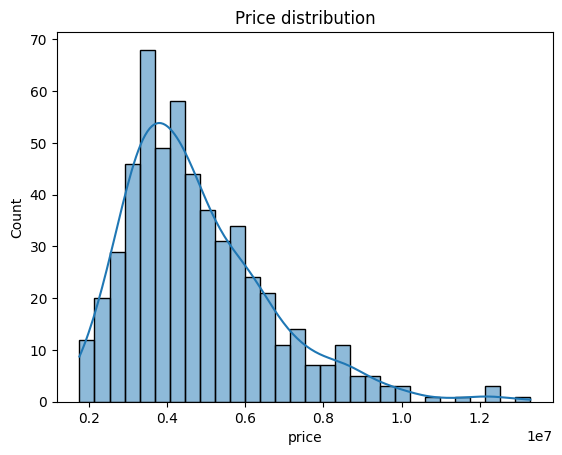

In [217]:
""" We will now utilize seaborn (imported as sns) for the graphical analysis.
We give two parameters:
kde (Kernel Density Estimation): we set it to True to generate a curve representing the probability density function of the plotted variable.
bins: we set it to 30, meaning that we want to display 30 bins.
The result is a graph representing the price on the X axis, and the amount of houses with that price on the Y-axis.
"""
sns.histplot(df['price'], kde=True, bins=30) 
plt.title('Price distribution')
plt.show()



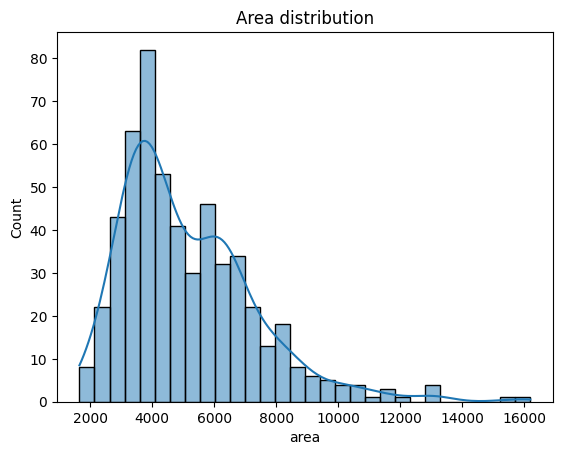

In [218]:
sns.histplot(df['area'], kde=True, bins=30)
plt.title('Area distribution')
plt.show()

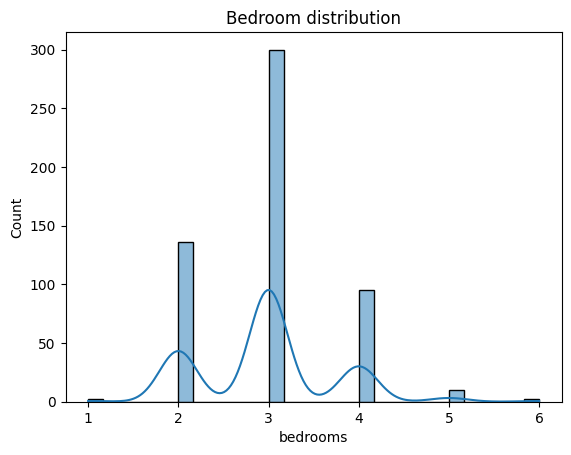

In [219]:
sns.histplot(df['bedrooms'], kde=True, bins=30)
plt.title('Bedroom distribution')
plt.show()

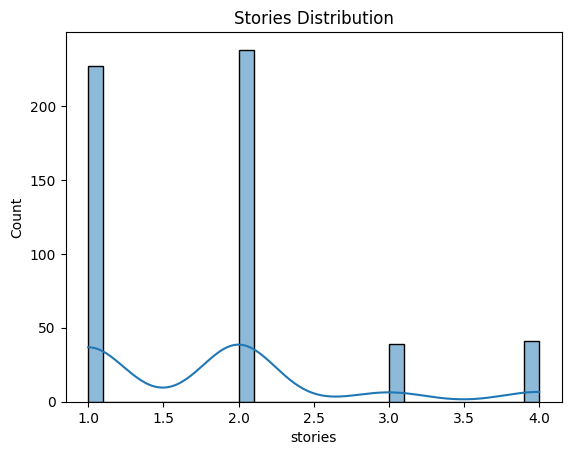

In [220]:
sns.histplot(df['stories'], kde=True, bins=30)
plt.title('Stories Distribution')
plt.show()

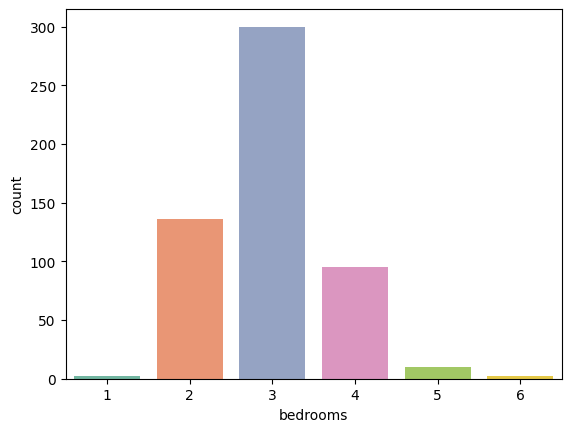

In [221]:
sns.countplot(x='bedrooms', data=df, palette='Set2') # palette is used to set the colors
plt.show()

### 7. Skewness and Kurtosis
We could see from the price distribution that there is some skewness. Let's compute skewness and kurtosis.

In [222]:
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

# Reminder:
# Right-skewed: Positive kurtosis
# High tail (and more extreme values): positive kurtosis

Skewness: 1.212239
Kurtosis: 1.960130


## Heatmap

To analyze **correlations**, one very useful thing is a **correlation matrix**, which we can see here represented as a **heatmap**. Check the values on the x and y axis, and you will see in the small corresponding square how much they are correlated. The colors also help you visualize correlations.

<Axes: >

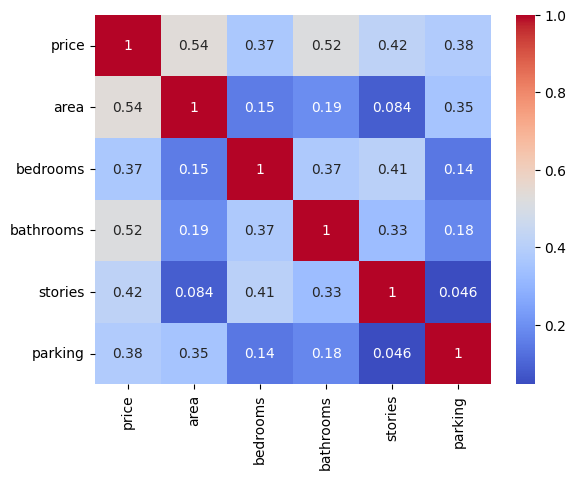

In [223]:
sns.heatmap(df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']].corr(), annot=True, cmap='coolwarm')

## 8. Bivariate Analysis
## 8.1 Numerical vs Numerical

* ### Price vs Area
* ### Price vs Bedroom
* ### Price vs stories

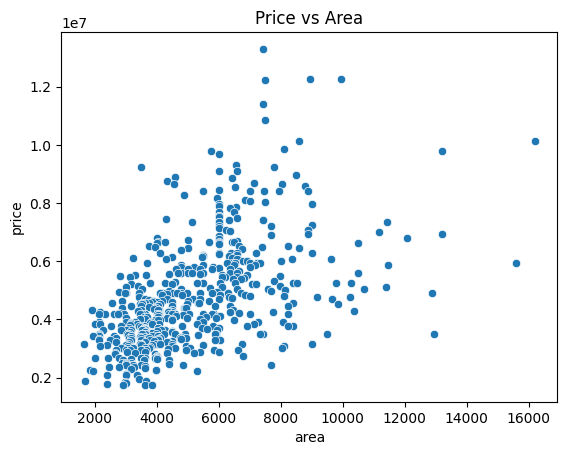

In [224]:
# We now represent the data in a scatterplot. We plot price and area.

sns.scatterplot(x='area', y='price', data=df)
plt.title('Price vs Area')
plt.show()

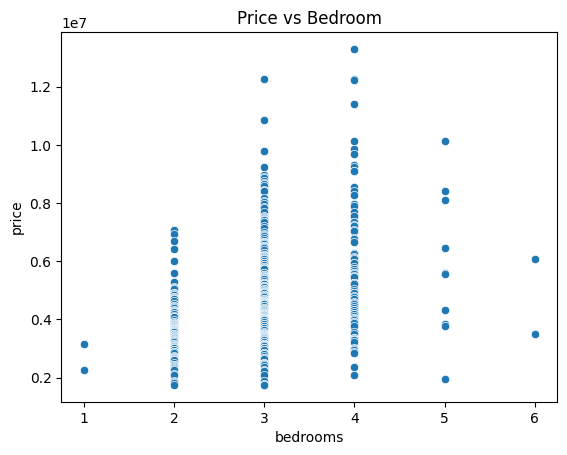

In [225]:
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('Price vs Bedroom')
plt.show()

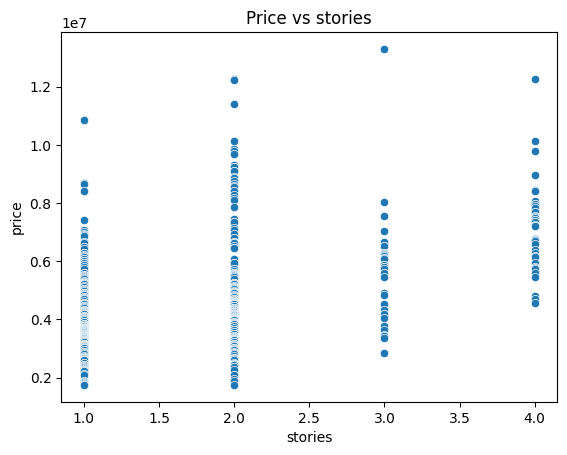

In [226]:
sns.scatterplot(x='stories', y='price', data=df)
plt.title('Price vs stories')
plt.show()

## 8.2 Categorical vs Numerical

*  Price by mainroad
*  Price by airconditioning
*  Price by hotwaterheating
*  Price by furnishingstatus

To plot categorical vs numerical variables, a very good strategy is to use a boxplot. Remember that you will be able to deduct several information from a first look at the boxplot: Median, mean, skewness...
Try to infer these information from the graphs.

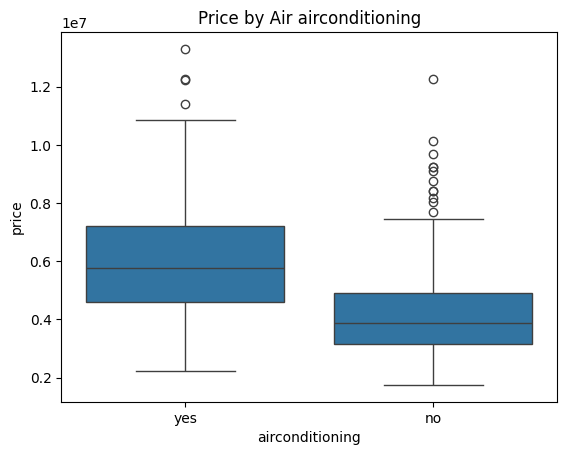

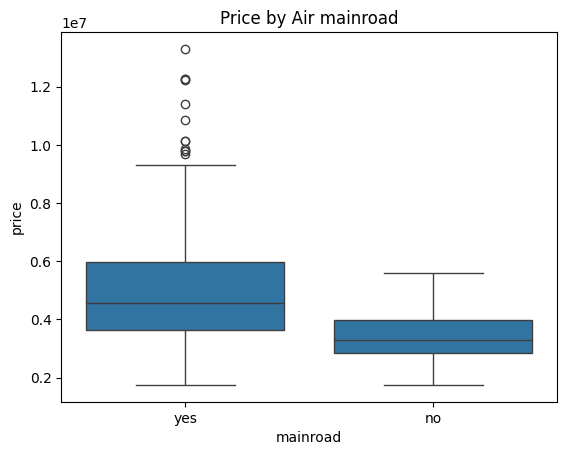

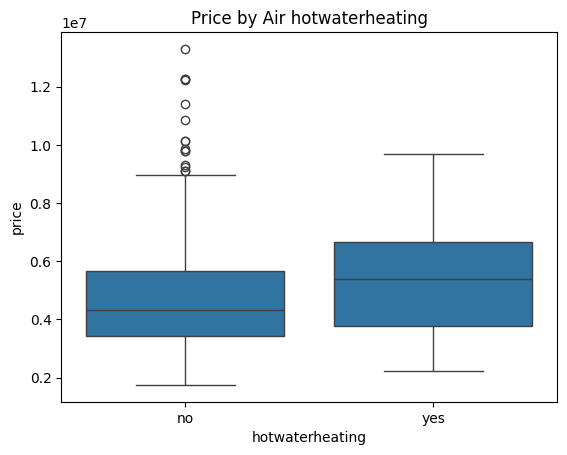

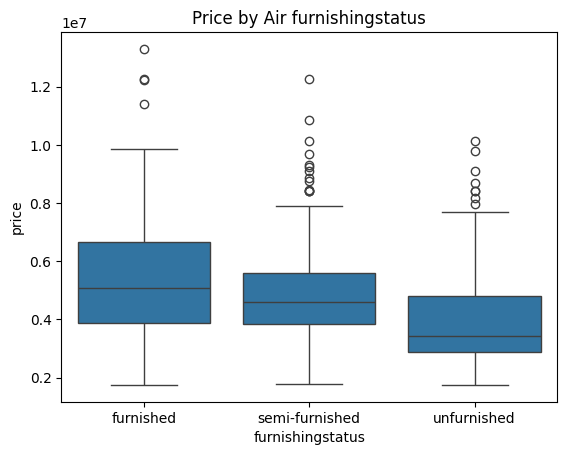

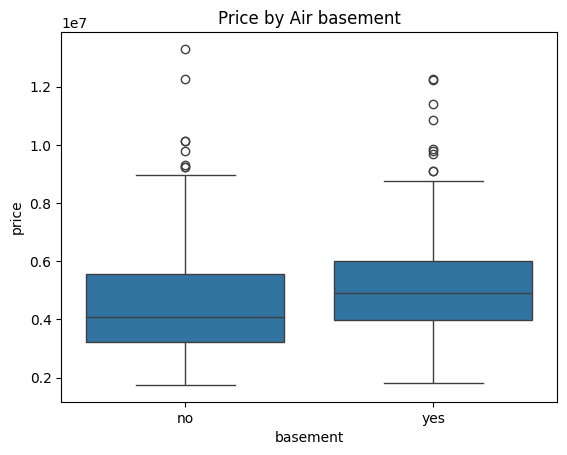

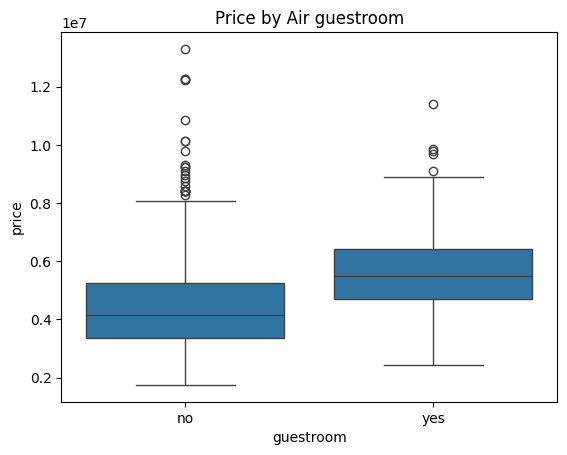

In [227]:
cat_features = ['airconditioning', 'mainroad', 'hotwaterheating', 'furnishingstatus', 'basement', 'guestroom']

for cat in cat_features:
    sns.boxplot(data=df, x=cat, y='price')
    plt.title(f'Price by Air {cat}')
    plt.show()

## 8.3 Categorical vs Categorical

In [228]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Cross-tabulation is the first strategy to deal with categorical variables.

<Axes: xlabel='guestroom'>

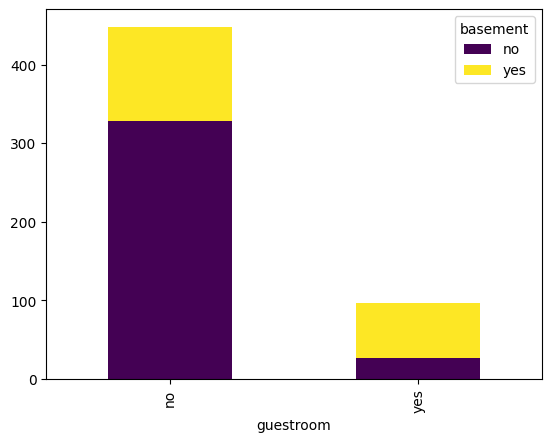

In [229]:
ct = pd.crosstab(df['guestroom'], df['basement'])
ct.plot(kind='bar', stacked=True, colormap='viridis')

<Axes: xlabel='airconditioning'>

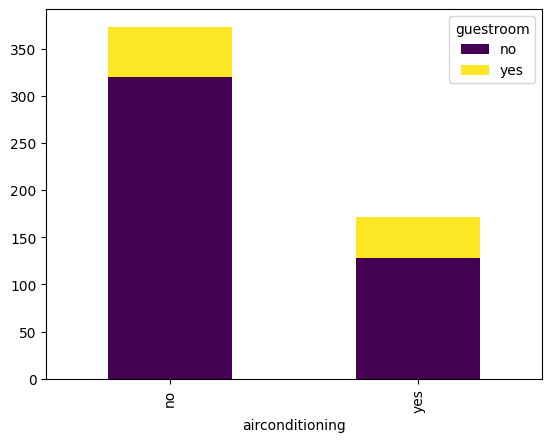

In [230]:
ct = pd.crosstab(df['airconditioning'], df['guestroom'])
ct.plot(kind='bar', stacked=True, colormap='viridis')

<Axes: xlabel='airconditioning'>

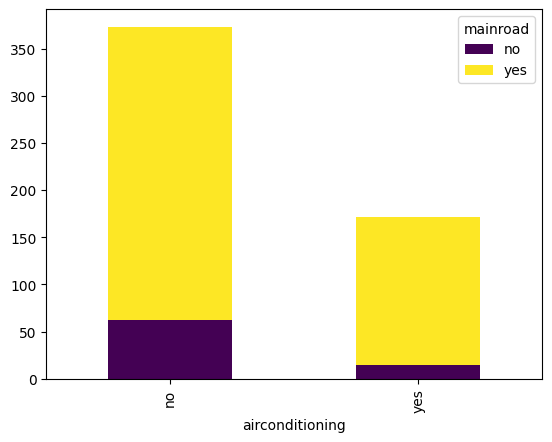

In [231]:
ct = pd.crosstab(df['airconditioning'], df['mainroad'])
ct.plot(kind='bar', stacked=True, colormap='viridis')

<Axes: xlabel='airconditioning'>

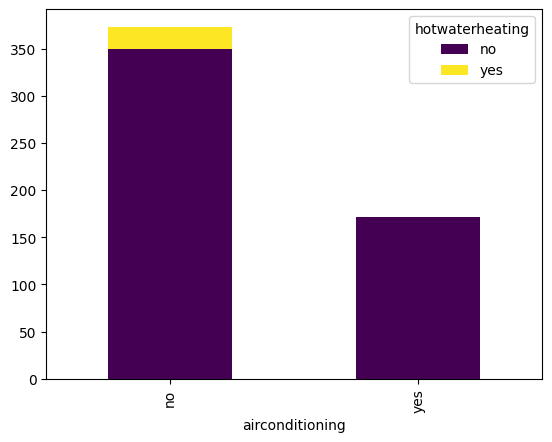

In [232]:
ct = pd.crosstab(df['airconditioning'], df['hotwaterheating'])
ct.plot(kind='bar', stacked=True, colormap='viridis')

<Axes: xlabel='airconditioning'>

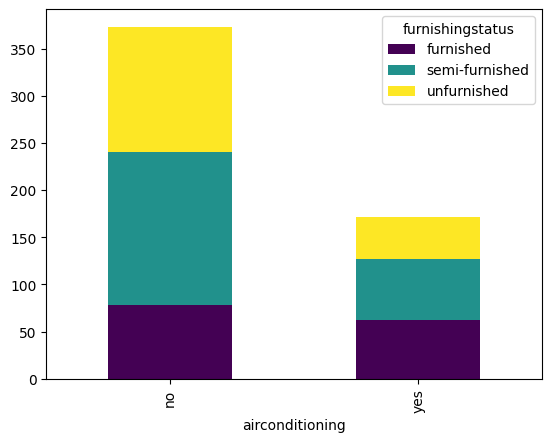

In [233]:
ct = pd.crosstab(df['airconditioning'], df['furnishingstatus'])
ct.plot(kind='bar', stacked=True, colormap='viridis')

## 9. Plot for Multivariate Relationships

Good news: Seaborn offers a very useful built-in function to analyze **multivariate relationships**, namely pairplot(). A pairplot displays all the pairwise combinations of variables from your data as scatterplots. Notice that this too is **symmatrical along the diagonal**.

In [234]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


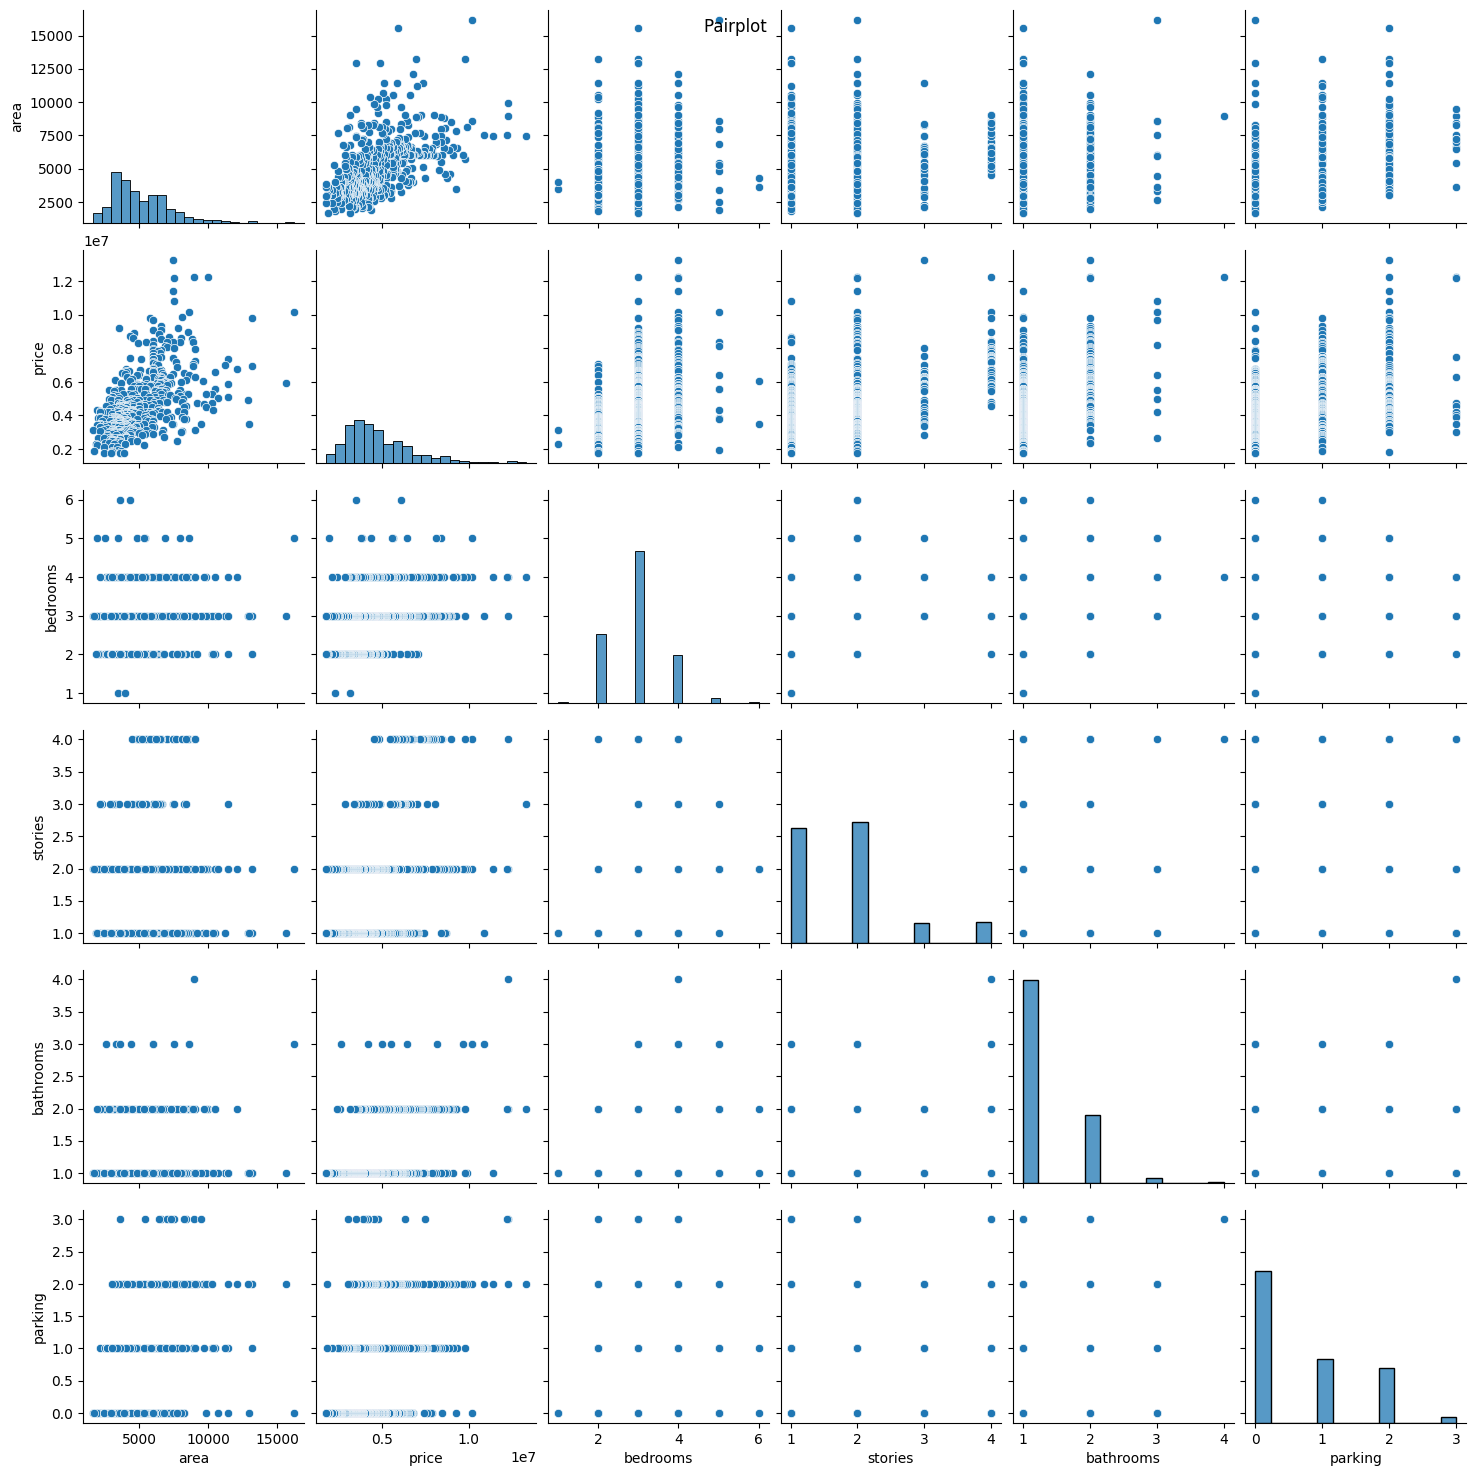

In [235]:
sns.pairplot(df, vars=['area', 'price', 'bedrooms', 'stories', 'bathrooms', 'parking'])
plt.suptitle('Pairplot ')
plt.show()

## 10. Outlier Detection

<Axes: xlabel='price'>

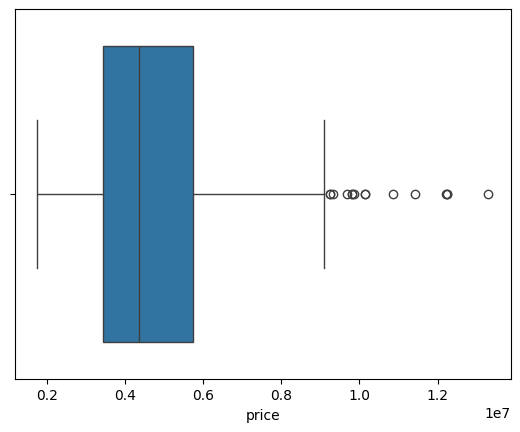

In [236]:
sns.boxplot(x=df['price'])

Normally, outliers do not have a precise definition in statistics. However, when using IQR, the most common method is to multiply IQR by 1.5, and subtract or add the results to the lower and upper bound. We will do this here:

In [237]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]
print("Outliers:\n", outliers)


Outliers:
        price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0   13300000   7420         4          2        3      yes        no       no   
1   12250000   8960         4          4        4      yes        no       no   
2   12250000   9960         3          2        2      yes        no      yes   
3   12215000   7500         4          2        2      yes        no      yes   
4   11410000   7420         4          1        2      yes       yes      yes   
5   10850000   7500         3          3        1      yes        no      yes   
6   10150000   8580         4          3        4      yes        no       no   
7   10150000  16200         5          3        2      yes        no       no   
8    9870000   8100         4          1        2      yes       yes      yes   
9    9800000   5750         3          2        4      yes       yes       no   
10   9800000  13200         3          1        2      yes        no      yes   
11   9681000   60